In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent / "scripts"))
from train import DataProcessor

In [3]:
df = pd.read_csv('../data/vehical.csv')
data_processor = DataProcessor(df)

df = data_processor.drop_unnecessary_and_NA_values(cols=['Title', "Model", "Car/Suv", "Location", "Engine", "ColourExtInt"])\
    .remove_dash_symbol()\
    .remove_POA_values()\
    .from_cat_to_int(cols_for_convert=['Seats', 'Doors', 'CylindersinEngine', 'Kilometres'])\
    .from_cat_to_float(cols_convert_to_float=['FuelConsumption'],)\
    .convert_to_int(cols_to_int=['Price', 'Year'])\
    .get_dataframe()

df.head(10)

Converting to int: 100%|██████████| 2/2 [00:00<?, ?it/s]


,Brand,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,DEMO,Automatic,AWD,Diesel,8.7,5595,4,SUV,4,7,51990
1,MG,2022,USED,Automatic,Front,Premium,6.7,16,4,Hatchback,5,5,19990
2,BMW,2022,USED,Automatic,Rear,Premium,6.6,8472,4,Coupe,2,4,108988
3,Renault,2022,USED,Automatic,Front,Unleaded,6.0,1035,4,SUV,4,5,34990
4,Land,2017,USED,Automatic,AWD,Diesel,5.1,67662,4,SUV,2,4,62280
5,Nissan,2000,USED,Automatic,Front,Unleaded,8.0,300539,4,Hatchback,5,5,2995
6,Toyota,2013,USED,Automatic,Rear,Premium,7.1,82012,4,Coupe,2,4,24888
7,Honda,2014,USED,Automatic,Front,Hybrid,4.5,38229,4,Hatchback,5,5,17900
8,Toyota,2018,USED,Automatic,Rear,Unleaded,9.8,16324,4,Commercial,4,2,41999
9,Toyota,2016,USED,Automatic,Rear,Diesel,8.0,229829,4,Commercial,4,2,27995


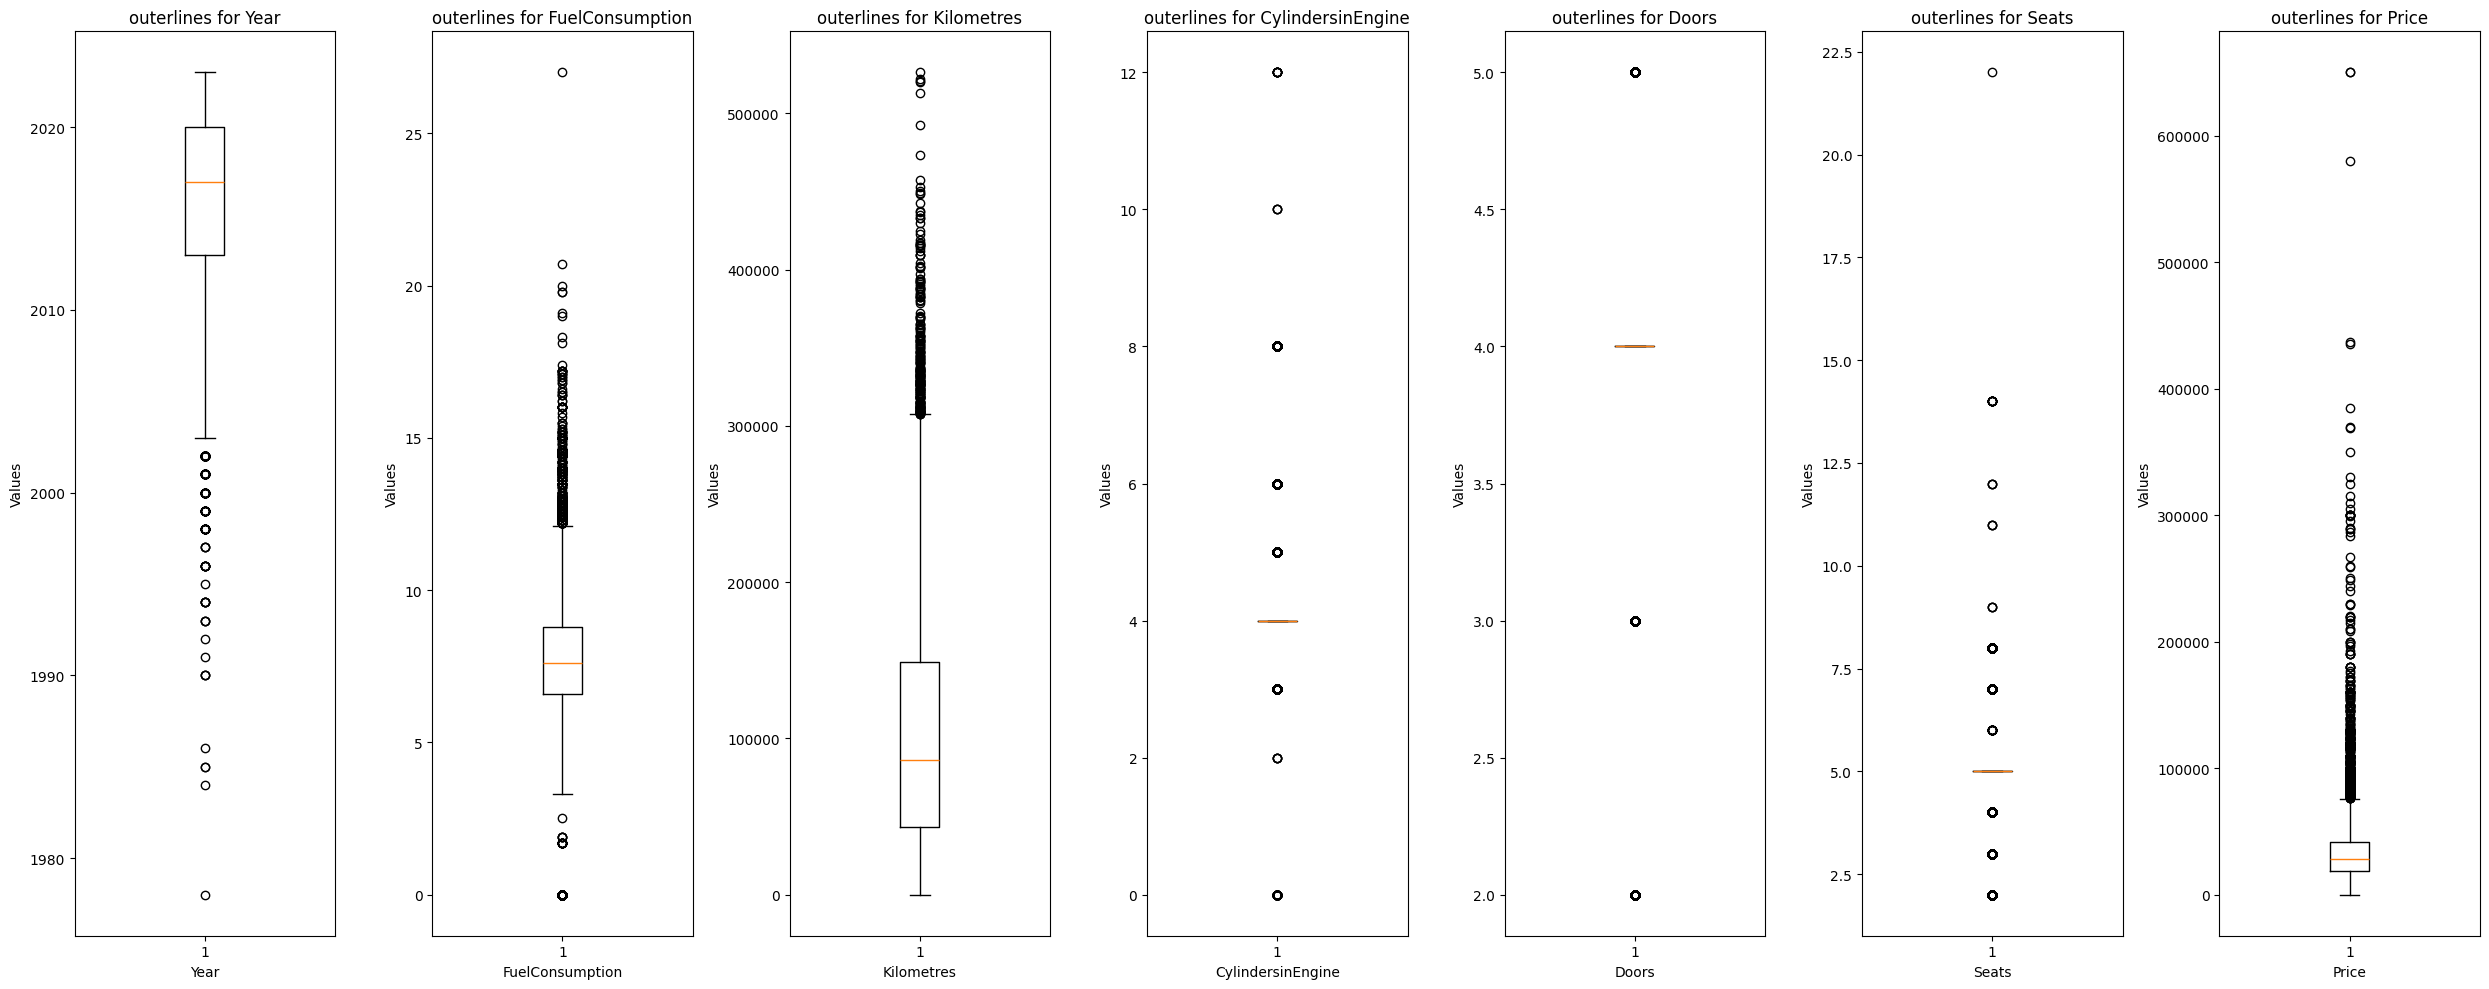

In [4]:
# Outliers
numerical_cols = ['Year', 'FuelConsumption', "Kilometres", "CylindersinEngine", "Doors", "Seats", "Price"]

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(25, 10))

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])    
    axes[i].set_title(f'outerlines for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

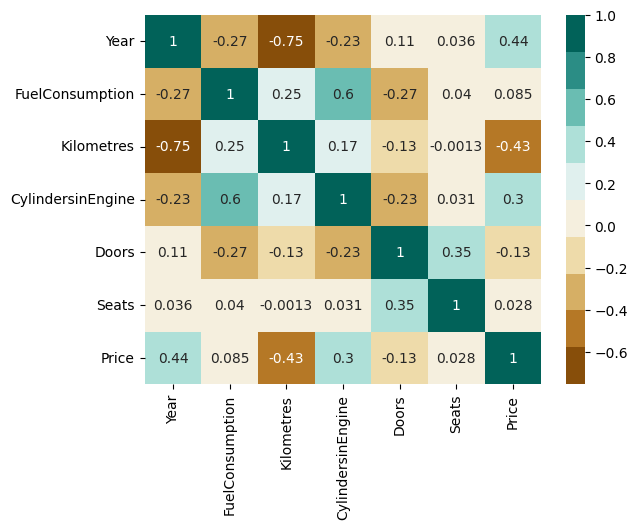

In [5]:
# Correlation Heatmap
correlation = df.corr(numeric_only=True)
colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlation, cmap=colormap, annot=True)

plt.show()

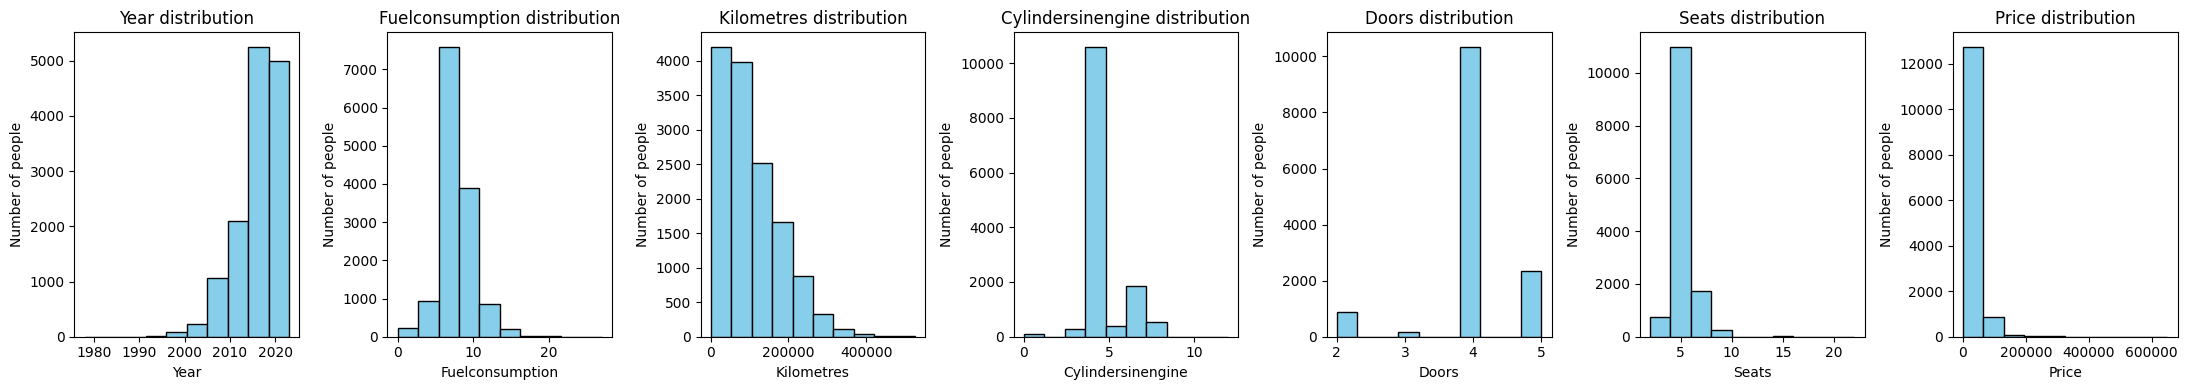

In [6]:
numerical_data = df[numerical_cols]
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(22, 4))

for i, col in enumerate(numerical_cols):
    axes[i].hist(numerical_data[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col.capitalize()} distribution')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of people')
    
plt.tight_layout()
plt.show()

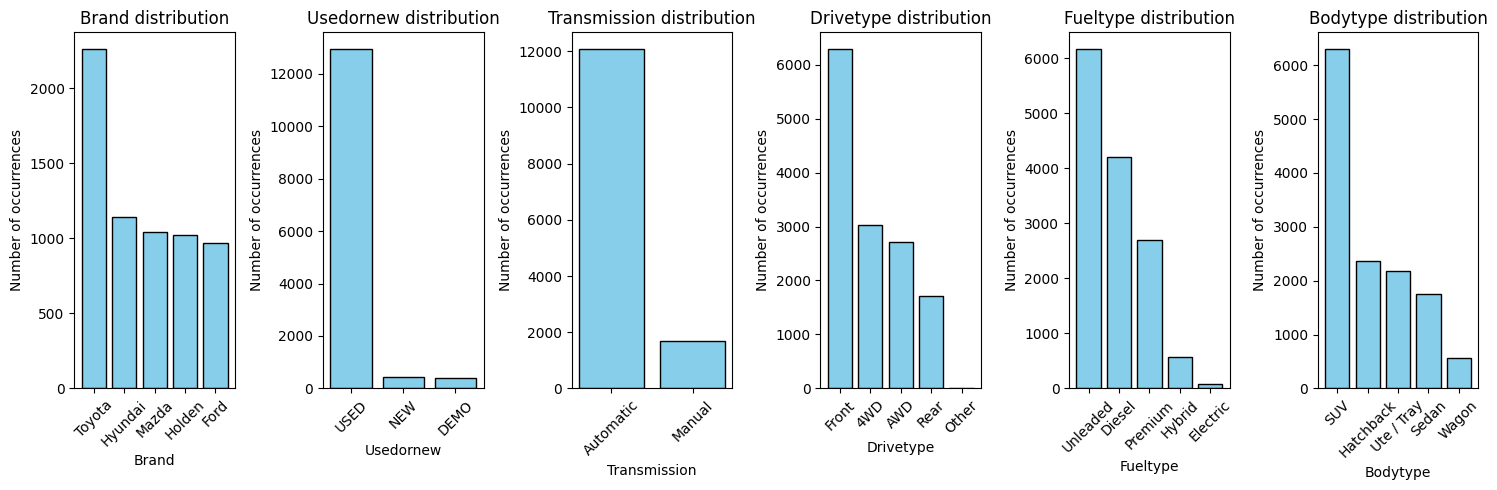

In [11]:
categorical_data = df[["Brand", "UsedOrNew", "Transmission", "DriveType", "FuelType", "BodyType"]]

fig, axes = plt.subplots(1, len(categorical_data.columns), figsize=(15, 5))
for i, col in enumerate(categorical_data.columns):
    value_counts = categorical_data[col].value_counts()

    if len(value_counts) > 5:
        value_counts = value_counts.head(5)

    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col.capitalize()} distribution')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of occurrences')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
